## A quick function for the estimation of the smoothness

In [1]:

from __future__ import print_function, division
import numpy as np
import scipy.signal as signal
import scipy.ndimage.filters as filters
import matplotlib.pyplot as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [5]:
def smoothness(data, dimension=1):
    """
    Estimate smoothness of data
    
    returns: fwhm as defined by Chp 18, Random Field Theory, Keith Worsley, SPM book
    """
    # normalize data
    data -= data.mean()
    data = data / np.linalg.norm(data)
    deriv = np.gradient(data)
    
    return np.sqrt(4*np.log(2)) * (np.linalg.norm(deriv)**(-1./dimension))
    
def fwhm2sigma(fwhm):
    return fwhm/np.sqrt(8*np.log(2))

In [6]:
ndata = 2000
estimated = []
for fwhm in np.arange(2, 20):
    a = np.random.normal(100,1,size=(ndata,))
    sigma = fwhm2sigma(fwhm)
    gaussian = signal.gaussian(100, sigma)
    convolved_data = filters.convolve1d(a, gaussian, mode='wrap')
    estimated.append(smoothness(convolved_data))
    

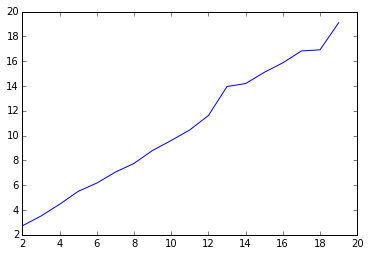

In [7]:
plt.plot(np.arange(2, 20), estimated)